In [85]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
import matplotlib.cm as cm

In [10]:

def xdot(y, t, alpha, eps):
    
    x1, x2 = y
    
    if x2 > eps:
        return [-1 + x2, x2 - x1]
    elif x2 < -eps:
        return [-1 - x2, x1 + x2]
    else:
        return [ alpha *(-1 + x2) + (1 - alpha) * (-1 - x2),
                 alpha *(x2 - x1) + (1 - alpha) * (x2 + x1)]

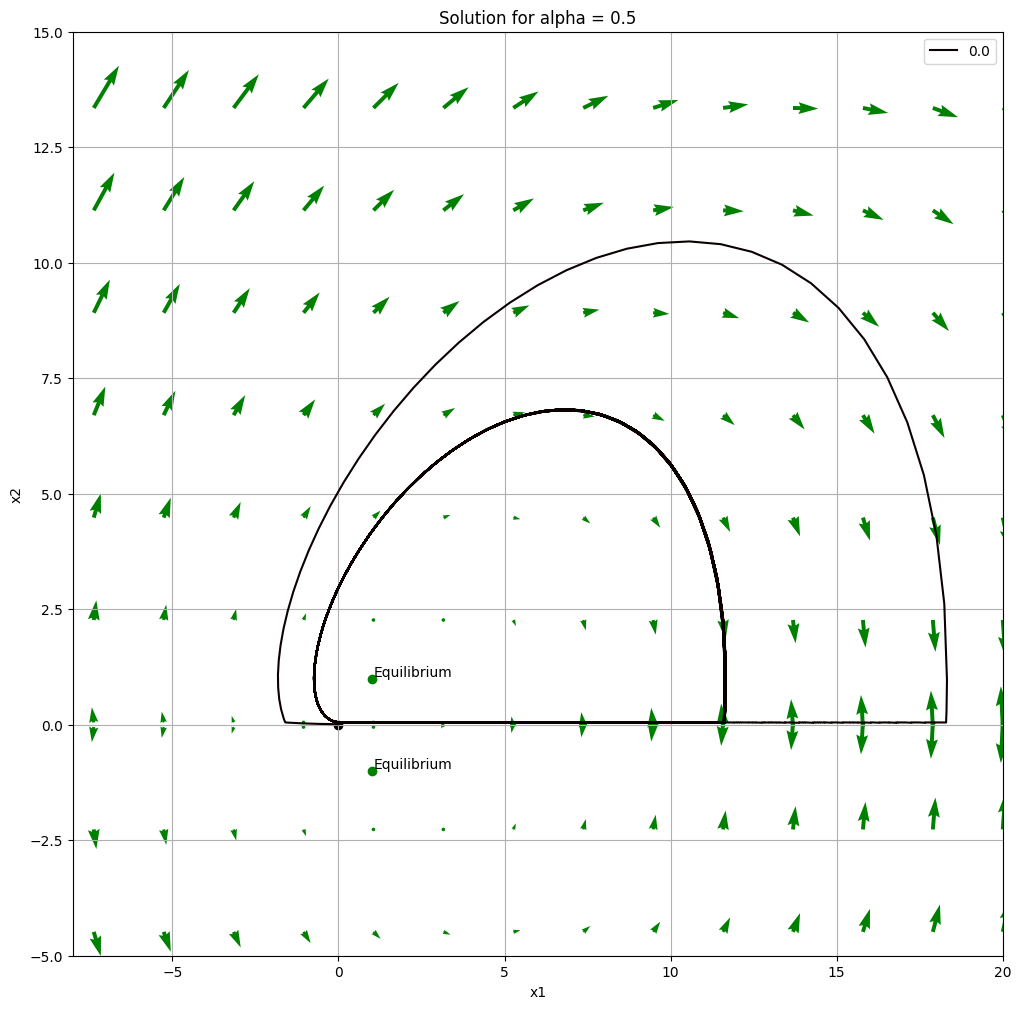

In [131]:
#define time range
#timespan = np.linspace(0, 25, 1000)
timespan = (0., 500.)
#initial conditions
x0s = np.linspace(0, 1, 1)
y0 = 0.01
alpha = 0.5
eps = 0.05

colors = np.linspace(0, 1 / max(max(x0s), 1), 5)
fig, axs = plt.subplots(1, 1, figsize =(12, 12))
i = 0
for x0 in x0s:  
    initial_conditions = [x0, y0]
    #Getting numerical Solution
    sol = solve_ivp(lambda t, y: xdot(y, t, alpha, eps), t_span=timespan, y0=initial_conditions, max_step = 0.1)
    #Picking coords of solution 
    x, y = sol.y
    axs.plot(x, y, color = cm.hot(min(colors[i]**3, 0.7)), label = x0)
    i+=1
    
bound = 20 #PLotting bounds for x and y axis


#Adding a small buffer for which the boundary term will occupy
xpos, ypos= np.meshgrid(np.linspace(-bound, bound, 20),  
                   np.linspace(eps , bound, 10)) 
xmin, ymin= np.meshgrid(np.linspace(-bound, bound, 20),  
                   np.linspace(-bound, -eps, 10)) 
#xbound, ybound = np.meshgrid(np.linspace(-bound, bound, 200),  
#                   np.linspace(-eps, eps, 4))


#Update vector fields
#Vector directions for f plus and f minus
uplus = -1 + ypos
vplus = ypos - xpos
umin = -1 - ymin
vmin = xmin + ymin
#ubound = alpha * uplus + (1 - alpha) * umin
#vbound = alpha * vplus + (1 - alpha) * vmin




# Plotting Vector Field
axs.quiver(xpos, ypos, uplus, vplus, color='g') 
axs.quiver(xmin, ymin, umin, vmin, color='g') 
#axs.quiver(xbound, ybound, ubound, vbound, color = 'r')
axs.set_title('Solution for alpha = {}'.format(alpha))
axs.grid(True)
axs.scatter([0], [0], color = 'k')
axs.scatter([1, 1], [1, -1], color = 'g')

axs.annotate("Equilibrium", (1.05, 1.05))
axs.annotate("Equilibrium", (1.05, -0.95))
#axs.annotate("Initial", (x0 - 1, y0 - 0.1))
#axs.annotate("Final", (x[-1] - 1, y[-1] + 0.5))

axs.set_xlabel("x1")
axs.set_ylabel("x2")
axs.legend()
# Setting x, y boundary limits 
plt.xlim(-8, bound) 
plt.ylim(-5, 15) 
  
# Show plot with grid 
 
plt.show() 